# Understanding Descriptive Statistics

Import the necessary libraries here:

In [59]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as sp
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def roll_dice(n):

    dice = [1,2,3,4,5,6]
    roll = np.random.choice(dice,n)
    return (list(roll))
    

roll_dice_df = pd.DataFrame(roll_dice(10))
roll_dice_df.head(10)

,0
0,3
1,2
2,3
3,2
4,3
5,4
6,1
7,6
8,5
9,2


#### 2.- Plot the results sorted by value.

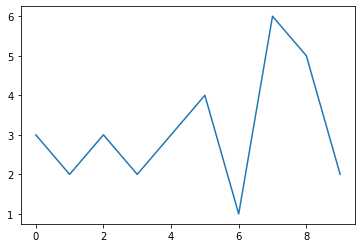

In [3]:
# your code here
plt.plot(roll_dice_df).sort()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002520A77D710>]],
      dtype=object)

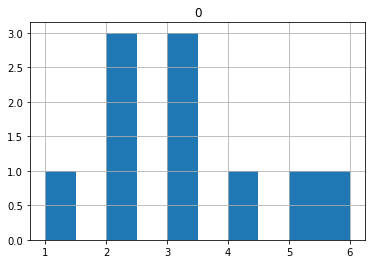

In [4]:
# your code here
roll_dice_df.hist()
#plt.show()

In [5]:
"""
In this plot, we can see the frequency of occurence of each value in the dataframe.
In the above plot, we could only see the numbers that occur one by one.
"""

'\nIn this plot, we can see the frequency of occurence of each value in the dataframe.\nIn the above plot, we could only see the numbers that occur one by one.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
roll_dice_df = roll_dice_df.rename(columns={0:'result'})
roll_dice_df.columns
roll_dice_df.head()


,result
0,3
1,2
2,3
3,2
4,3


In [7]:
# your code here

# dataframe to list
roll_dice_lst = roll_dice_df['result'].tolist()
#print(roll_dice_lst)

#define function
def mean(x):
    mean = sum(x) / len(x)
    #print(sum(x))
    #print(len(x))
    return(mean)

mean(roll_dice_lst)

3.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

# calculate frequency distribution
def freq_dist(x):
    
    dice = [1,2,3,4,5,6]
    freq_dist_lst = [x.count(i) for i in dice]
    
    return freq_dist_lst

# calculate the mean

freq = freq_dist(roll_dice_lst)

mean(freq)

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here
def median(x):
    #print(x)
    
    # sort the list
    s = sorted(x)
    #print(s)
    
    # calculate median for even lists
    if len(x) % 2 == 0:
        i = int(len(x)/2)
        #print(i)
        median = (s[i-1] + s[i])/2
    
    # calculate median for odd lists
    else:
        i = int((len(x)/2) + 0.5)
        print(i)
        median = s[i-1]
       
    return median

#teste = [3,4,6,1,1,1,6,6,4,6]

median(roll_dice_lst)
#median(teste)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here
def quartiles(x):
    # sort the list
    s = sorted(x)
    #print(s)
    
    # define quartile boundaries
    min_value = s[0]
    max_value = s[len(x)]
    median = median(x)
    median_i = 
    '''
    #indexes
    q1_i = (len(x)+1)/4
    q3_i = (len(x)+1)*3/4
    '''
    # calculate quartiles
    if 
    q1 = 
    
    
    

SyntaxError: invalid syntax (<ipython-input-10-eaac66d6e9ff>, line 11)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

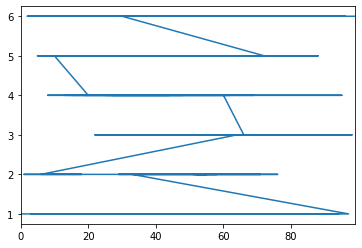

In [11]:
# your code here
hundred_df = pd.read_csv(r"C:\Users\Ana André\Ironhack\lab-understanding-descriptive-stats\lab-understanding-descriptive-stats\data\roll_the_dice_hundred.csv", index_col=0)

hundred_sorted = hundred_df.sort_values(by='value')
#dice_sorted.head()

hundred_sorted['value'].plot()

In [12]:
"""
I see a crazy line.
"""

'\nI see a crazy line.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
# your code here

# dataframe to list
hundred_lst = hundred_sorted['value'].tolist()
mean(hundred_lst)

3.74

#### 3.- Now, calculate the frequency distribution.


In [14]:
# your code here

freq_dist(hundred_lst)


[12, 17, 14, 22, 12, 23]

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

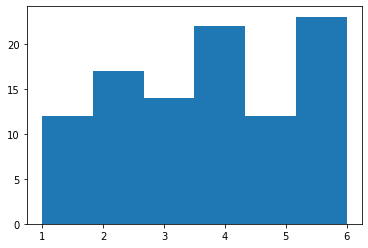

In [15]:
# your code here
plt.hist(hundred_lst,6)
plt.show()

In [24]:
median(hundred_lst)

4.0

In [27]:
"""
In terms of shape, I would say the histogram is slightly left skewed. Although the frequency range is not that wide, which could
sugest a uniform shape, there are more values that fall on the right side as for that I'd say that the shape is left skewed.
The mean (3.74) is slightly on the left side of the median (4).
"""

"\nIn terms of shape, I would say the histogram is slightly left skewed. Although the frequency range is not that wide, which could\nsugest a uniform shape, there are more values that fall on the right side as for that I'd say that the shape is left skewed.\nThe mean (3.74) is slightly on the left side of the median (4).\n"

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [28]:
# your code here
thousand_df = pd.read_csv(r"C:\Users\Ana André\Ironhack\lab-understanding-descriptive-stats\lab-understanding-descriptive-stats\data\roll_the_dice_thousand.csv", index_col=0)
thousand_df.head()

thousand_lst = thousand_df['value'].tolist()

freq_dist(thousand_lst)


[175, 167, 175, 168, 149, 166]

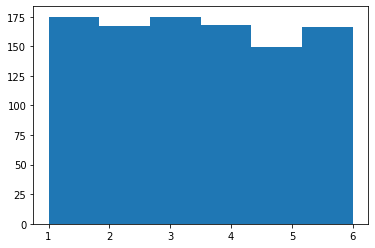

In [29]:
plt.hist(thousand_lst,6)
plt.show()

In [30]:
mean(thousand_lst)

3.447

In [31]:
median(thousand_lst)

3.0

In [32]:
"""
In this case, the mean(3.447) falls on the right side of the median (3.0) which sugest a slightly right-skewed shape.
Anyway, I'd say the shape remains almost uniform.
Again, the frequency range is not that wide.
"""

"\nIn this case, the mean(3.447) falls on the right side of the median (3.0) which sugest a slightly right-skewed shape.\nAnyway, I'd say the shape remains almost uniform.\nAgain, the frequency range is not that wide.\n"

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [72]:
# your code here
ages_pop_df = pd.read_csv(r"C:\Users\Ana André\Ironhack\lab-understanding-descriptive-stats\lab-understanding-descriptive-stats\data\ages_population.csv")
ages_pop_df.head()


,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


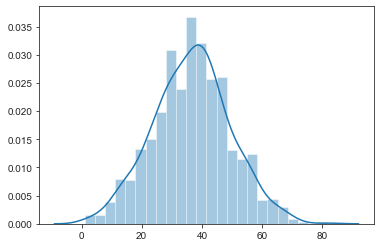

In [64]:
sns.distplot(ages_pop_df)

In [66]:
# estimations:
# mean = 36
# standard deviation = 26

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [69]:
# your code here
np.mean(ages_pop_df)
ages_pop_df.std()


observation    12.8165
dtype: float64

In [ ]:
"""
the mean fall inside my range, the standard deviation not.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

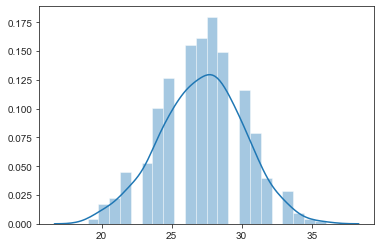

In [73]:
# your code here
ages_pop2_df = pd.read_csv(r"C:\Users\Ana André\Ironhack\lab-understanding-descriptive-stats\lab-understanding-descriptive-stats\data\ages_population2.csv")
#ages_pop2_df.head()
sns.distplot(ages_pop2_df)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [74]:
"""
there are some gaps.
also the population is younger.
"""

'\nthere are some gaps.\nalso the population is younger.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [77]:
# your code here
ages_pop2_df.mean()
ages_pop2_df.std()

observation    2.969814
dtype: float64

In [78]:
"""
mean = 27.155
std = 2.97 which mean the range of values is smaller

both values are lower than in step 2.

"""

'\nmean = 27.155\nstd = 2.97\n\nboth values are lower than in step 2.\n\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

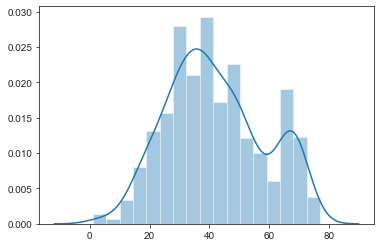

In [81]:
# your code here
ages_pop3_df = pd.read_csv(r"C:\Users\Ana André\Ironhack\lab-understanding-descriptive-stats\lab-understanding-descriptive-stats\data\ages_population3.csv")
sns.distplot(ages_pop3_df)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [89]:
# your code here
mean = ages_pop3_df.mean()
ages_pop3_df.std()

observation    16.144706
dtype: float64

In [ ]:
"""
mean = 41.989
std ? 16.14

both values are higher than those in step 1. the population is older this time and the range of values is wider.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [90]:
# your code here
print("Q1 = " + str(np.percentile(ages_pop3_df, 25)))
print("Q2 = " + str(np.percentile(ages_pop3_df, 50)))
print("Q3 = " + str(np.percentile(ages_pop3_df, 75)))
print("the difference between median and mean is " + str(np.percentile(ages_pop3_df, 50) - mean))

Q1 = 30.0
Q2 = 40.0
Q3 = 53.0
the difference between median and mean is observation   -1.989
dtype: float64


In [ ]:
"""
this result means that the mean value falls on the right side of the meadian which means right skewness.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [92]:
# your code here
print(np.percentile(ages_pop3_df, 10))
print(np.percentile(ages_pop3_df, 90))

22.0
67.0


In [ ]:
"""
there more older than younger people.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""